In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\computer vision\train'
validation_dir = r'C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\computer vision\validation'
test_dir = r'C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\computer vision\test'

In [4]:
#Feature exttractor
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#classifier
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(64 , 64),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [ ]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 5,
                         callbacks = callbacks)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 1.2602 - acc: 0.3481
Epoch 1: val_loss improved from inf to 0.92161, saving model to C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\E1-cp-0001-loss0.92.h5
50/50 [==============================] - 46s 869ms/step - loss: 1.2602 - acc: 0.3481 - val_loss: 0.9216 - val_acc: 0.5446
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.9052 - acc: 0.5475
Epoch 2: val_loss improved from 0.92161 to 0.73350, saving model to C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\E1-cp-0002-loss0.73.h5
50/50 [==============================] - 13s 256ms/step - loss: 0.9052 - acc: 0.5475 - val_loss: 0.7335 - val_acc: 0.6250
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.7212 - acc: 0.6506
Epoch 3: val_loss improved from 0.73350 to 0.50936, saving model to C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\E1-cp-0003-loss0.51.h5
50/50 [==============================] - 13s 251ms/s

In [11]:
model_history.history

{'loss': [1.2602038383483887,
  0.9051811099052429,
  0.721223771572113,
  0.5870653390884399,
  0.5412908792495728],
 'acc': [0.34812501072883606,
  0.5475000143051147,
  0.6506249904632568,
  0.7206249833106995,
  0.7425000071525574],
 'val_loss': [0.9216068387031555,
  0.7335030436515808,
  0.5093623399734497,
  0.47338899970054626,
  0.3848244845867157],
 'val_acc': [0.5446428656578064,
  0.625,
  0.7232142686843872,
  0.7410714030265808,
  0.7723214030265808]}

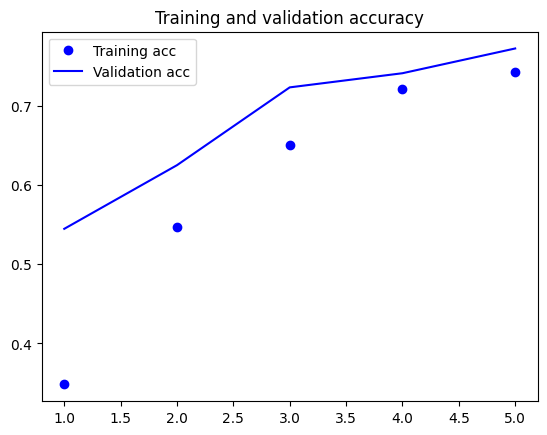

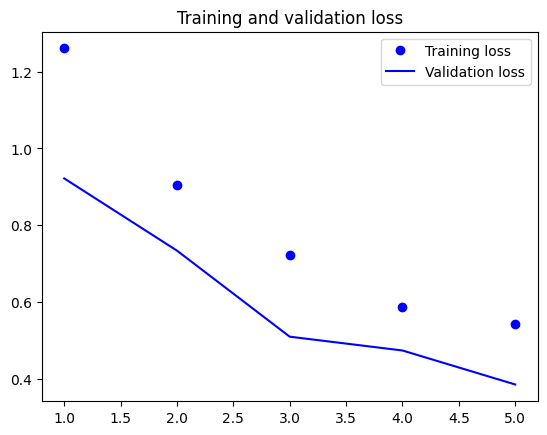

<Figure size 640x480 with 0 Axes>

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 1s 88ms/step


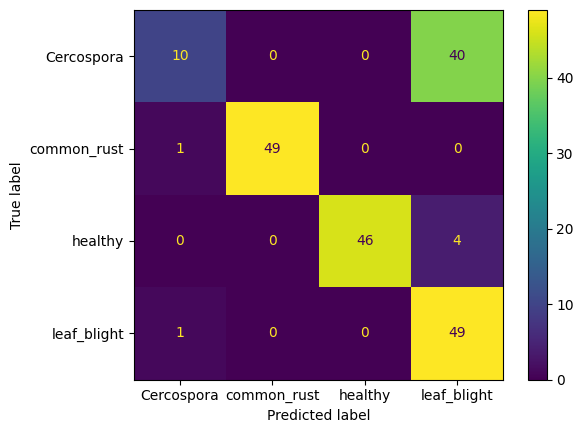

In [17]:
model = load_model(r'C:\Users\Engr. Mujeeb\Desktop\machienl\lab11 12 13\lab13\E1-cp-0005-loss0.38.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [ ]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))